In [1]:
# Imports
# Add directories to path in order to import modules
import sys
import os
# Import pandas to read csv files
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Helpers')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Process_Interface')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Inference_Engine')))

# Import matplotlib to visualize data
import matplotlib.pyplot as plt

# Import data, algorithms and machine-learning-models
from MLModels import importMLModels as MLModels
import algorithms as algs
import data_point_addresses as dp
import connectors as machine_data

# Import EnPIs and Fuzzy Control System
from EnPIs import calculate_EnPIs
from FIS import FuzzyControlSystem


# Main User Interface
<br>

The _main user interface_ allows users to input data and interact with outputs.
<br>

It consists of two components:

   1.   Knowledge acquisition
   2.   Results

## 1. Knowledge acquisition
<br>

With the following links you will be directed to the specified sections in the Knowledge Base to gather Information about the system.
<br>
1. [Machine Description](../Knowledge_Base/knowledge_base.ipynb#1.-Machine-description)
2. [Data Point Definition](../Knowledge_Base/knowledge_base.ipynb#2.-Data-point-definition)
3. [EnPI Definition](../Knowledge_Base/knowledge_base.ipynb#3.-EnPI-definition)
4. [Energy Information](../Knowledge_Base/knowledge_base.ipynb#4.-Energy-information)
5. [Fuzzy Rule Base Definition](../Knowledge_Base/knowledge_base.ipynb#5.-Fuzzy-rule-base-definition)
6. [Sample Data](../Knowledge_Base/knowledge_base.ipynb#6.-Sample-data)
7. [Case Knowledge](../Knowledge_Base/knowledge_base.ipynb#7.-Case-knowledge)



## 2. Results

You can go to the results block in the _Knowledge Base_ <a href="../Knowledge_Base/knowledge_base.ipynb#results">here</a>.

In [2]:
# This code block is used to calculate the result of the expert system
# Function to load data based on the selected mode (offline/online)
def load_data(mode='offline'):
    """
    Load data based on the selected mode: 'offline' for CSV or 'online' for OPC UA.
    """
    if mode == 'offline':
        # Load data from offline CSV file
        try:
            # Read the CSV file for offline data. Replace with the path to your offline data file or replace the file in the current path.
            return pd.read_csv('../Helpers/offline_measurement_data.csv')
        except FileNotFoundError:
            print("Offline data file not found.")
            return None
    elif mode == 'online':
        # Fetch data using OPC UA connector
        try:
            print("Connecting to OPC UA server...")
            values = machine_data.read_opcua_values(dp.server_url, dp.node_ids)
            return pd.DataFrame(values, columns=['NodeID', 'Value'])
        except Exception as e:
            print(f"Error fetching data from OPC UA server: {e}")
            return None
    else:
        print("Invalid mode. Please choose 'online' or 'offline'.")
        return None

# Function to process the columns and apply algorithms after data is loaded. Our example only uses the first column.
# This is where EnPIs are calculated and the Fuzzy Control System is applied to calculate the final result.
def process_columns(data):
    """Process data columns, apply the algorithm, and calculate EnPIs."""
    if data is not None:
        column_name = data.columns[0]

        # Apply example Algorithm
        summed_up = algs.exampleAlgorithm(data)

        # Compute EnPIs
        enpis, normalized_enpis = calculate_EnPIs(data, summed_up)

        # Create Fuzzy Control System and compute results for EnPIs_min and EnPIs_max
        fis = FuzzyControlSystem()
        output = fis.set_input(normalized_enpis[f'Min {column_name}'], normalized_enpis[f'Max {column_name}'])

        # Combine the results and write them to a file
        final_result = {**enpis, 'FIS Output': output}

        with open('../Knowledge_Base/results.txt', 'w') as f:
            f.write(str(final_result))

        # Print results
        with open('../Knowledge_Base/results.txt', 'r') as f:
            print(f.read())
    else:
        print("No data to process.")

# Function to handle mode change
def on_mode_change(change):
    """Handles data loading and processing upon mode selection."""
    # Clear previous output
    output_widget.clear_output()

    # Fill empty output widget with new output
    with output_widget:

        mode = change['new']

        # Load data based on chosen mode
        data = load_data(mode)
        
        print("\nResults: \n")
        # Process columns once data is loaded
        process_columns(data)
    
# Function to display the mode selection dropdown
def display_data_choice():
    """Displays a dropdown for the user to select between 'offline' and 'online' data."""
    mode_widget = widgets.Dropdown(
        options=['offline', 'online'],
        value='offline',  # Default value
        description='Data Mode:',
        disabled=False
    )

    # Link the dropdown widget to the mode change function in order to change the output based on the selected mode
    mode_widget.observe(on_mode_change, names='value')

    # Display the dropdown widget
    display(mode_widget)

    # When first executing the code block, the output for the offline mode will be displayed
    # If you don't want that, delete this line of code
    on_mode_change({'new': mode_widget.value})

# Initialize the output widget used to display the data
output_widget = widgets.Output()

# Call to display the dropdown for mode selection
display_data_choice()

# Display the output widget
display(output_widget)

Dropdown(description='Data Mode:', options=('offline', 'online'), value='offline')

Output()

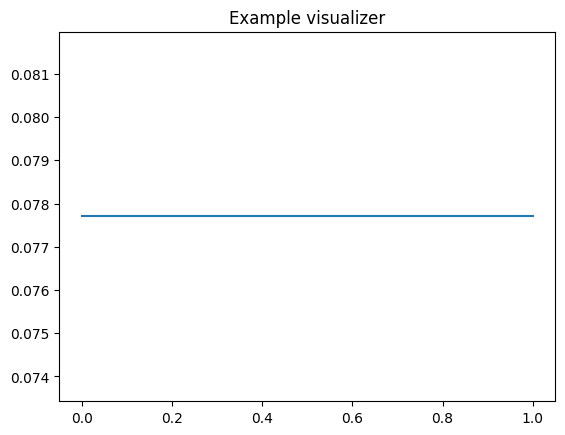

In [3]:
# Plot data
plt.plot([0.0777,0.0777])

# Add labels
plt.title('Example visualizer')

# Show plot
plt.show()